<a href="https://colab.research.google.com/github/palashbhasme/IDS-ML/blob/main/IDS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install google-colab
# !pip install matplotlib

In [ ]:
!pip install scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV
# from skopt import BayesSearchCV

In [ ]:
# url='https://drive.google.com/file/d/18L1bYn19HUA5k982Eiw8dO6Kinp61RHg/view?usp=drive_link'
# url='https://drive.google.com/uc?id=' + url.split('/')[-2]
# df = pd.read_csv(url)
# df = pd.read_csv('drive/MyDrive/datasets/LAdataset/nsl-kdd/KDDTrain+.txt')
df = pd.read_csv('/Users/sensa/Downloads/KDDTrain+.txt')

columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])
df.columns = columns
df.head()

In [ ]:
df = pd.read_csv('/Users/sensa/Downloads/KDDTest+')


NameError: name 'pd' is not defined

In [ ]:
# url='https://drive.google.com/file/d/16YbWOYEeCILRTgKIxTmrpUSpA6RBQxtp/view?usp=drive_link'
# url='https://drive.google.com/uc?id=' + url.split('/')[-2]
# test_df = pd.read_csv(url)
# test_df = pd.read_csv('drive/MyDrive/datasets/LAdataset/nsl-kdd/KDDTest+.txt')
test_df = pd.read_csv('/Users/sensa/Downloads/KDDTest+.txt')

columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])
test_df.columns = columns
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [ ]:
df.info()

In [ ]:
df['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [ ]:
df['attack'] = df['attack'].apply(lambda val: 0 if val=='normal' else 1)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1,21


In [ ]:
df = df.drop(columns='level')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1


In [ ]:
df.groupby('attack').size()

attack
0    67342
1    58630
dtype: int64

In [ ]:
test_df['attack'] = test_df['attack'].apply(lambda val: 0 if val=='normal' else 1)
test_df = test_df.drop(columns='level')

In [ ]:
Y_train = df['attack']
X_train = df.drop(columns='attack')

Y_test = test_df['attack']
X_test = test_df.drop(columns='attack')

In [ ]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

cols_train = X_train.select_dtypes('object').columns
cols_test = X_test.select_dtypes('object').columns

X_train_encoded = one_hot_encoder.fit_transform(X_train[cols_train])
X_test_encoded = one_hot_encoder.transform(X_test[cols_test])

new_cols_names_train = one_hot_encoder.get_feature_names_out(cols_train)
new_cols_names_test = one_hot_encoder.get_feature_names_out(cols_test)

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=new_cols_names_train, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=new_cols_names_test, index=X_test.index)

X_train = pd.concat([X_train.drop(columns=cols_train), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=cols_test), X_test_encoded_df], axis=1)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Columns: 122 entries, duration to flag_SH
dtypes: float64(99), int64(23)
memory usage: 117.3 MB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Columns: 122 entries, duration to flag_SH
dtypes: float64(99), int64(23)
memory usage: 21.0 MB


In [ ]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [ ]:
minmax_scaler = MinMaxScaler()
X_train = minmax_scaler.fit_transform(X_train)
X_test = minmax_scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_predict = knn.predict(X_test)
knn_cm = confusion_matrix(Y_test, knn_predict)
knn_acc_score = accuracy_score(Y_test, knn_predict)
print('Confusion matrix: ')
print(knn_cm)
print()
print(f'Accuracy of K Neighbours classifier: {knn_acc_score}')
print()
print(classification_report(Y_test, knn_predict))

Confusion matrix: 
[[9027  684]
 [4515 8317]]

Accuracy of K Neighbours classifier: 0.7693740850818436

              precision    recall  f1-score   support

           0       0.67      0.93      0.78      9711
           1       0.92      0.65      0.76     12832

    accuracy                           0.77     22543
   macro avg       0.80      0.79      0.77     22543
weighted avg       0.81      0.77      0.77     22543



In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, Y_train)
lr_predict = lr.predict(X_test)
lr_cm = confusion_matrix(Y_test, lr_predict)
lr_acc_score = accuracy_score(Y_test, lr_predict)
print('Confusion matrix: ')
print(lr_cm)
print()
print(f'Accuracy of Logistic Regression: {lr_acc_score}')
print()
print(classification_report(Y_test, lr_predict))

Confusion matrix: 
[[8989  722]
 [4838 7994]]

Accuracy of Logistic Regression: 0.7533602448653685

              precision    recall  f1-score   support

           0       0.65      0.93      0.76      9711
           1       0.92      0.62      0.74     12832

    accuracy                           0.75     22543
   macro avg       0.78      0.77      0.75     22543
weighted avg       0.80      0.75      0.75     22543



In [ ]:
threshold = 0.02
lr_predict = (lr.predict_proba(X_test)[:, 1] > threshold).astype('float')
lr_cm = confusion_matrix(Y_test, lr_predict)
lr_acc_score = accuracy_score(Y_test, lr_predict)
print('Confusion matrix: ')
print(lr_cm)
print()
print(f'Accuracy of Logistic Regression: {lr_acc_score}')
print()
print(classification_report(Y_test, lr_predict))

Confusion matrix: 
[[ 7808  1903]
 [ 2656 10176]]

Accuracy of Logistic Regression: 0.79776427272324

              precision    recall  f1-score   support

           0       0.75      0.80      0.77      9711
           1       0.84      0.79      0.82     12832

    accuracy                           0.80     22543
   macro avg       0.79      0.80      0.80     22543
weighted avg       0.80      0.80      0.80     22543



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb_predict = gnb.predict(X_test)
gnb_cm = confusion_matrix(Y_test, gnb_predict)
gnb_acc_score = accuracy_score(Y_test, gnb_predict)
print('Confusion matrix: ')
print(gnb_cm)
print()
print(f'Accuracy of Gaussian Naive Bayes: {gnb_acc_score}')
print()
print(classification_report(Y_test, gnb_predict))

Confusion matrix: 
[[9648   63]
 [9739 3093]]

Accuracy of Gaussian Naive Bayes: 0.5651865324047376

              precision    recall  f1-score   support

           0       0.50      0.99      0.66      9711
           1       0.98      0.24      0.39     12832

    accuracy                           0.57     22543
   macro avg       0.74      0.62      0.53     22543
weighted avg       0.77      0.57      0.51     22543



In [ ]:
threshold = 0.001
gnb_predict = (gnb.predict_proba(X_test)[:, 1] > threshold).astype('float')
gnb_predict = gnb.predict(X_test)
gnb_cm = confusion_matrix(Y_test, gnb_predict)
gnb_acc_score = accuracy_score(Y_test, gnb_predict)
print('Confusion matrix: ')
print(gnb_cm)
print()
print(f'Accuracy of Gaussian Naive Bayes: {gnb_acc_score}')
print()
print(classification_report(Y_test, gnb_predict))

Confusion matrix: 
[[9648   63]
 [9739 3093]]

Accuracy of Gaussian Naive Bayes: 0.5651865324047376

              precision    recall  f1-score   support

           0       0.50      0.99      0.66      9711
           1       0.98      0.24      0.39     12832

    accuracy                           0.57     22543
   macro avg       0.74      0.62      0.53     22543
weighted avg       0.77      0.57      0.51     22543



In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', random_state=40)
dtc.fit(X_train, Y_train)
dtc_predict = dtc.predict(X_test)
dtc_cm = confusion_matrix(Y_test, dtc_predict)
dtc_acc_score = accuracy_score(Y_test, dtc_predict)
print('Confusion matrix: ')
print(dtc_cm)
print()
print(f'Accuracy of Decision Tree Classifier: {dtc_acc_score}')
print()
print(classification_report(Y_test, dtc_predict))

Confusion matrix: 
[[8938  773]
 [3996 8836]]

Accuracy of Decision Tree Classifier: 0.7884487424034068

              precision    recall  f1-score   support

           0       0.69      0.92      0.79      9711
           1       0.92      0.69      0.79     12832

    accuracy                           0.79     22543
   macro avg       0.81      0.80      0.79     22543
weighted avg       0.82      0.79      0.79     22543



In [ ]:
threshold = 0.001
dtc_predict = (dtc.predict_proba(X_test)[:, 1] > threshold).astype('float')
dtc_cm = confusion_matrix(Y_test, dtc_predict)
dtc_acc_score = accuracy_score(Y_test, dtc_predict)
print('Confusion matrix: ')
print(dtc_cm)
print()
print(f'Accuracy of Decision Tree Classifier: {dtc_acc_score}')
print()
print(classification_report(Y_test, dtc_predict))

Confusion matrix: 
[[8938  773]
 [3987 8845]]

Accuracy of Decision Tree Classifier: 0.7888479794171139

              precision    recall  f1-score   support

           0       0.69      0.92      0.79      9711
           1       0.92      0.69      0.79     12832

    accuracy                           0.79     22543
   macro avg       0.81      0.80      0.79     22543
weighted avg       0.82      0.79      0.79     22543



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Initialize and train RandomForestClassifier on reduced data
rfc_reduced = RandomForestClassifier(random_state=42)
rfc_reduced.fit(X_train_reduced, Y_train)

# Predict using reduced test data
rfc_predict_reduced = rfc_reduced.predict(X_test_reduced)

# Evaluate performance
rfc_cm_reduced = confusion_matrix(Y_test, rfc_predict_reduced)
rfc_acc_score_reduced = accuracy_score(Y_test, rfc_predict_reduced)

# Print results
print('Confusion matrix (on reduced data): ')
print(rfc_cm_reduced)
print()
print(f'Accuracy of Random Forest Classifier (on reduced data): {rfc_acc_score_reduced}')
print()
print(classification_report(Y_test, rfc_predict_reduced))


Confusion matrix (on reduced data): 
[[    0  9711]
 [    0 12832]]

Accuracy of Random Forest Classifier (on reduced data): 0.5692232622099986

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9711
           1       0.57      1.00      0.73     12832

    accuracy                           0.57     22543
   macro avg       0.28      0.50      0.36     22543
weighted avg       0.32      0.57      0.41     22543



C:\Users\palas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\palas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\palas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
threshold = 0.01
rfc_predict = (rfc.predict_proba(X_test)[:, 1] > threshold).astype('float')
rfc_cm = confusion_matrix(Y_test, rfc_predict)
rfc_acc_score = accuracy_score(Y_test, rfcd_predict)
print('Confusion matrix: ')
print(rfc_cm)
print()
print(f'Accuracy of Random Forest Classifier: {rfc_acc_score}')
print()
print(classification_report(Y_test, rfc_predict))

Confusion matrix: 
[[ 8130  1581]
 [  216 12616]]

Accuracy of Random Forest Classifier: 0.9202856762631415

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      9711
           1       0.89      0.98      0.93     12832

    accuracy                           0.92     22543
   macro avg       0.93      0.91      0.92     22543
weighted avg       0.93      0.92      0.92     22543



In [ ]:
svc = SVC(C=2, probability=True, random_state=42)
svc.fit(X_train, Y_train)
svc_predict = svc.predict(X_test)
svc_cm = confusion_matrix(Y_test, svc_predict)
svc_acc_score = accuracy_score(Y_test, svc_predict)
print('Confusion matrix: ')
print(svc_cm)
print()
print(f'Accuracy of Logistic Regression: {svc_acc_score}')
print()
print(classification_report(Y_test, svc_predict))

Confusion matrix: 
[[9016  695]
 [4563 8269]]

Accuracy of Logistic Regression: 0.7667568646586523

              precision    recall  f1-score   support

           0       0.66      0.93      0.77      9711
           1       0.92      0.64      0.76     12832

    accuracy                           0.77     22543
   macro avg       0.79      0.79      0.77     22543
weighted avg       0.81      0.77      0.77     22543



In [ ]:
threshold = 0.007
svc_predict = (svc.predict_proba(X_test)[:, 1] > threshold).astype('float')
svc_cm = confusion_matrix(Y_test, svc_predict)
svc_acc_score = accuracy_score(Y_test, svc_predict)
print('Confusion matrix: ')
print(svc_cm)
print()
print(f'Accuracy of Support Vector Machine: {svc_acc_score}')
print()
print(classification_report(Y_test, svc_predict))

Confusion matrix: 
[[ 5854  3857]
 [ 1748 11084]]

Accuracy of Support Vector Machine: 0.7513640597968327

              precision    recall  f1-score   support

           0       0.77      0.60      0.68      9711
           1       0.74      0.86      0.80     12832

    accuracy                           0.75     22543
   macro avg       0.76      0.73      0.74     22543
weighted avg       0.75      0.75      0.75     22543



In [ ]:
p1, r1, t1 = precision_recall_curve(Y_test, svc.predict_proba(X_test)[:, 1]) # SVM
p2, r2, t2 = precision_recall_curve(Y_test, lr.predict_proba(X_test)[:, 1]) # Logistic Regression
p3, r3, t3 = precision_recall_curve(Y_test, dtc.predict_proba(X_test)[:, 1]) # Decision Tree Classifier
p4, r4, t4 = precision_recall_curve(Y_test, rfc.predict_proba(X_test)[:, 1]) # Random Forest Classifier
p5, r5, t5 = precision_recall_curve(Y_test, knn.predict_proba(X_test)[:, 1]) # K Neighbours Classifier
p6, r6, t6 = precision_recall_curve(Y_test, gnb.predict_proba(X_test)[:, 1]) # Gaussian NB

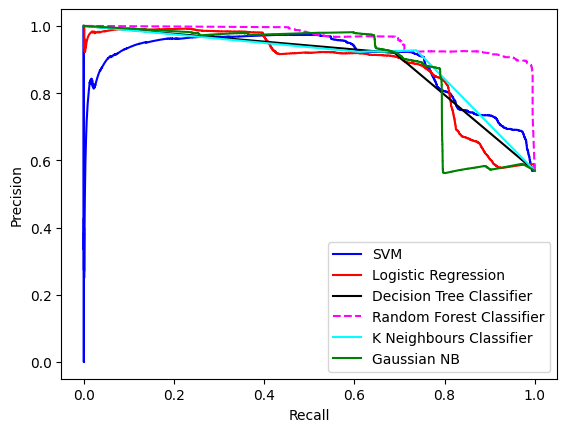

In [ ]:
plt.plot(r1, p1, color='blue')
plt.plot(r2, p2, color='red')
plt.plot(r3, p3, color='black')
plt.plot(r4, p4, '--', color='magenta')
plt.plot(r5, p5, color='cyan')
plt.plot(r6, p6, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(['SVM', 'Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'K Neighbours Classifier', 'Gaussian NB'], loc='lower right')
plt.show()

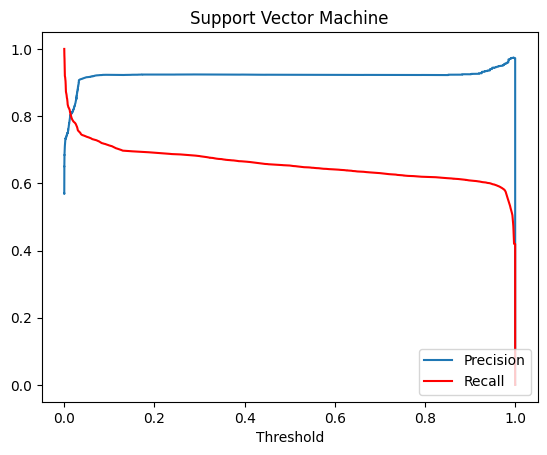

In [ ]:
plt.plot(t1, p1[:-1])
plt.plot(t1, r1[:-1], color='red')
plt.xlabel('Threshold')
plt.title('Support Vector Machine')
plt.legend(['Precision', 'Recall'], loc='lower right')
plt.show()

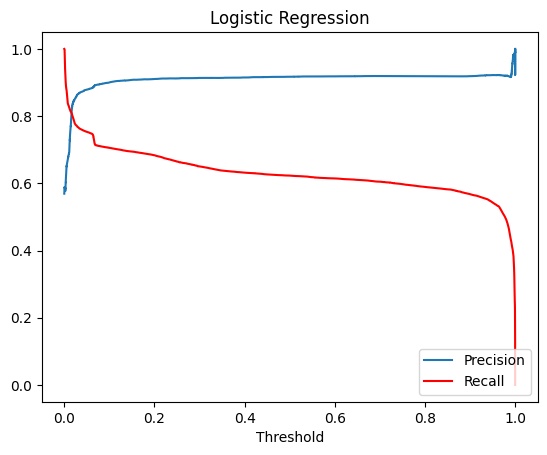

In [ ]:
plt.plot(t2, p2[:-1])
plt.plot(t2, r2[:-1], color='red')
plt.xlabel('Threshold')
plt.title('Logistic Regression')
plt.legend(['Precision', 'Recall'], loc='lower right')
plt.show()

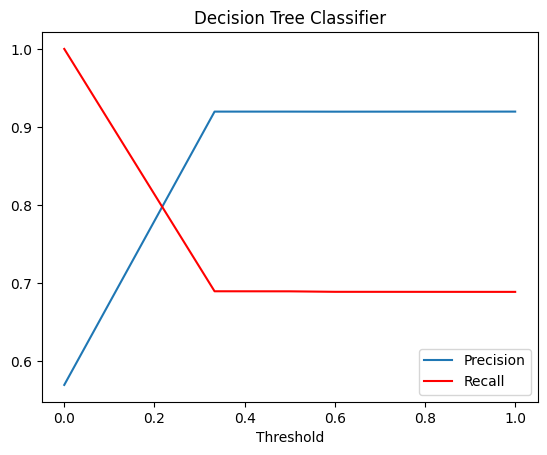

In [ ]:
plt.plot(t3, p3[:-1])
plt.plot(t3, r3[:-1], color='red')
plt.xlabel('Threshold')
plt.title('Decision Tree Classifier')
plt.legend(['Precision', 'Recall'], loc='lower right')
plt.show()

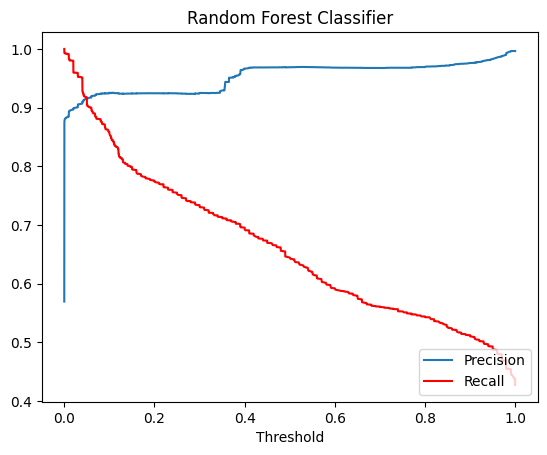

In [ ]:
plt.plot(t4, p4[:-1])
plt.plot(t4, r4[:-1], color='red')
plt.xlabel('Threshold')
plt.title('Random Forest Classifier')
plt.legend(['Precision', 'Recall'], loc='lower right')
plt.show()

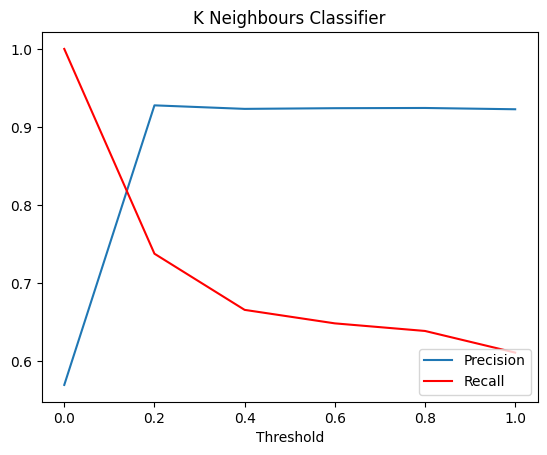

In [ ]:
plt.plot(t5, p5[:-1])
plt.plot(t5, r5[:-1], color='red')
plt.xlabel('Threshold')
plt.title('K Neighbours Classifier')
plt.legend(['Precision', 'Recall'], loc='lower right')
plt.show()

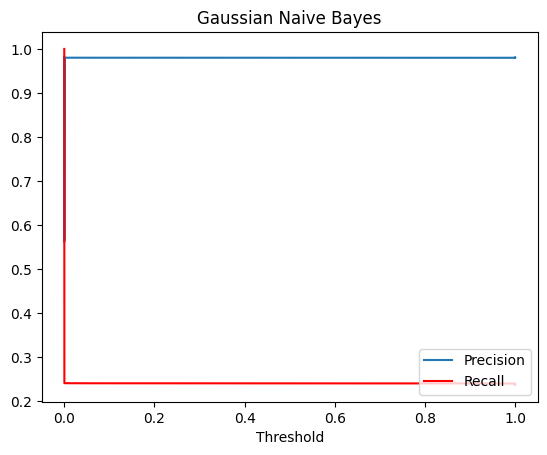

In [ ]:
plt.plot(t6, p6[:-1])
plt.plot(t6, r6[:-1], color='red')
plt.xlabel('Threshold')
plt.title('Gaussian Naive Bayes')
plt.legend(['Precision', 'Recall'], loc='lower right')
plt.show()

**Palash**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, C = 2)

clf3 = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)],
                        voting='soft',
                        weights=[0.8, 0.5])
voting_predictions = clf3.fit(X_reduced, Y_train).predict_proba(X_test_reduced)

In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_reduced, Y_train)
rfc_predict = rfc.predict(X_test_reduced)
rfc_cm = confusion_matrix(Y_test, rfc_predict)
rfc_acc_score = accuracy_score(Y_test, rfc_predict)
print('Confusion matrix: ')
print(rfc_cm)
print()
print(f'Accuracy of Random Forest Classifier: {rfc_acc_score}')
print()
print(classification_report(Y_test, rfc_predict))

Confusion matrix: 
[[9445  266]
 [4592 8240]]

Accuracy of Random Forest Classifier: 0.7845007319345251

              precision    recall  f1-score   support

           0       0.67      0.97      0.80      9711
           1       0.97      0.64      0.77     12832

    accuracy                           0.78     22543
   macro avg       0.82      0.81      0.78     22543
weighted avg       0.84      0.78      0.78     22543



In [ ]:
threshold = 0.01
rfc_predict = (rfc.predict_proba(X_test)[:, 1] > threshold).astype('float')
rfc_cm = confusion_matrix(Y_test, rfc_predict)
rfc_acc_score = accuracy_score(Y_test, rfc_predict)
print('Confusion matrix: ')
print(rfc_cm)
print()
print(f'Accuracy of Random Forest Classifier: {rfc_acc_score}')
print()
print(classification_report(Y_test, rfc_predict))

Confusion matrix: 
[[ 8130  1581]
 [  216 12616]]

Accuracy of Random Forest Classifier: 0.9202856762631415

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      9711
           1       0.89      0.98      0.93     12832

    accuracy                           0.92     22543
   macro avg       0.93      0.91      0.92     22543
weighted avg       0.93      0.92      0.92     22543



In [ ]:
voting_cm = confusion_matrix(Y_test, voting_predictions)
votin_acc_score = accuracy_score(Y_test, voting_predictions)
print('Confusion matrix: ')
print(voting_cm)
print()
print(f'Accuracy of Voting classifier: {votin_acc_score}')
print(classification_report(Y_test, knn_predictions))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, QuantileTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve

df = pd.read_csv('/Users/Public/Downloads/dataset/KDDTrain+.txt')


In [ ]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])
df.columns = columns
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
df = df.drop(columns='level')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [ ]:
df.groupby('attack').size()

attack
back                 956
buffer_overflow       30
ftp_write              8
guess_passwd          53
imap                  11
ipsweep             3599
land                  18
loadmodule             9
multihop               7
neptune            41214
nmap                1493
normal             67342
perl                   3
phf                    4
pod                  201
portsweep           2931
rootkit               10
satan               3633
smurf               2646
spy                    2
teardrop             892
warezclient          890
warezmaster           20
dtype: int64

In [ ]:
df['attack'] = df['attack'].apply(lambda val: 0 if val=='normal' else 1)
df.head(10)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1
5,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,1
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1
8,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,1
9,0,tcp,private,REJ,0,0,0,0,0,0,...,12,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1


In [ ]:
test_df = pd.read_csv('/Users/Public/Downloads/dataset/KDDTest+.txt')

columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])
test_df.columns = columns
test_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,...,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,18.017833
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,...,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,4.270409
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
df['attack'].unique()

array([0, 1], dtype=int64)

In [ ]:
df['attack'] = df['attack'].apply(lambda val: 0 if val=='normal' else 1)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,1
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,1
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1


In [ ]:
df.groupby('attack').size()

attack
1    125972
dtype: int64

In [ ]:
test_df['attack'] = test_df['attack'].apply(lambda val: 0 if val=='normal' else 1)
test_df = test_df.drop(columns='level')

In [ ]:
Y_train = df['attack']
X_train = df.drop(columns='attack')

Y_test = test_df['attack']
X_test = test_df.drop(columns='attack')

In [ ]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

cols_train = X_train.select_dtypes('object').columns
cols_test = X_test.select_dtypes('object').columns

X_train_encoded = one_hot_encoder.fit_transform(X_train[cols_train])
X_test_encoded = one_hot_encoder.transform(X_test[cols_test])

new_cols_names_train = one_hot_encoder.get_feature_names_out(cols_train)
new_cols_names_test = one_hot_encoder.get_feature_names_out(cols_test)

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=new_cols_names_train, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=new_cols_names_test, index=X_test.index)

X_train = pd.concat([X_train.drop(columns=cols_train), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=cols_test), X_test_encoded_df], axis=1)

In [ ]:
X_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Columns: 122 entries, duration to flag_SH
dtypes: float64(99), int64(23)
memory usage: 117.3 MB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Columns: 122 entries, duration to flag_SH
dtypes: float64(99), int64(23)
memory usage: 21.0 MB


In [ ]:
total_test_malicious = Y_test[:].sum()
print(total_test_malicious)

12832


In [ ]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, make_scorer


In [ ]:
import numpy as np
def min_recall_precision(est, X, y_true, sample_weight = None):
  y_pred = est.predict(X)
  recall = recall_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  return min(recall, precision)

In [ ]:
grid2 = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                    param_grid={'class_weight':[{0:1, 1:v} for v in np.linspace(1,20,30)]},
                    scoring = {'precision': make_scorer(precision_score),
                             'recall': make_scorer(recall_score),},
                    refit= 'recall',
                    cv = 4,
                    n_jobs=-1)
pred = grid2.fit(X_train, Y_train).predict(X_test).sum()
malicious_count = total_test_malicious
f"malicious:{malicious_count} predicted:{pred}"

'malicious:12832 predicted:10241'

In [ ]:
pd.DataFrame(grid2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,11.659524,1.319127,0.081814,0.012538,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",0.978865,0.978049,0.977496,0.977362,0.977943,0.000591,1,0.963772,0.963635,0.966025,0.966094,0.964881,0.001179,30
1,14.043635,1.927291,0.073517,0.011042,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",0.971971,0.970862,0.970971,0.969873,0.970920,0.000743,2,0.977144,0.975234,0.976668,0.977350,0.976599,0.000826,29
2,12.571810,2.123628,0.091034,0.029596,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",0.967475,0.965008,0.966427,0.965237,0.966037,0.000990,3,0.982261,0.980282,0.979943,0.981239,0.980931,0.000903,28
3,13.240842,0.839253,0.080683,0.017807,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",0.963332,0.961107,0.963270,0.961318,0.962257,0.001047,4,0.984035,0.982943,0.982262,0.983354,0.983149,0.000643,27
4,12.095785,1.450323,0.073011,0.005151,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",0.960279,0.957764,0.959646,0.957314,0.958751,0.001242,5,0.986355,0.985536,0.984786,0.985332,0.985502,0.000563,26
5,13.733943,1.630798,0.072599,0.011894,"{0: 1, 1: 4.275862068965517}","{'class_weight': {0: 1, 1: 4.275862068965517}}",0.956594,0.953150,0.956433,0.954294,0.955117,0.001454,6,0.987856,0.986900,0.986970,0.987106,0.987208,0.000381,25
6,11.445513,1.733239,0.067396,0.010976,"{0: 1, 1: 4.931034482758621}","{'class_weight': {0: 1, 1: 4.931034482758621}}",0.953070,0.950328,0.952835,0.951053,0.951821,0.001163,7,0.989288,0.988129,0.988198,0.988880,0.988624,0.000483,24
7,11.879706,1.073133,0.074512,0.006289,"{0: 1, 1: 5.586206896551724}","{'class_weight': {0: 1, 1: 5.586206896551724}}",0.949804,0.945724,0.949369,0.947324,0.948055,0.001640,8,0.990175,0.989084,0.990108,0.990108,0.989869,0.000454,23
8,11.706989,0.838946,0.066170,0.001546,"{0: 1, 1: 6.241379310344827}","{'class_weight': {0: 1, 1: 6.241379310344827}}",0.945805,0.941753,0.946069,0.945932,0.944890,0.001813,9,0.990653,0.989493,0.990926,0.990654,0.990432,0.000553,22
9,12.556546,0.567758,0.097012,0.021797,"{0: 1, 1: 6.896551724137931}","{'class_weight': {0: 1, 1: 6.896551724137931}}",0.943874,0.938583,0.942351,0.941718,0.941632,0.001927,10,0.991335,0.990516,0.991404,0.990995,0.991063,0.000351,21


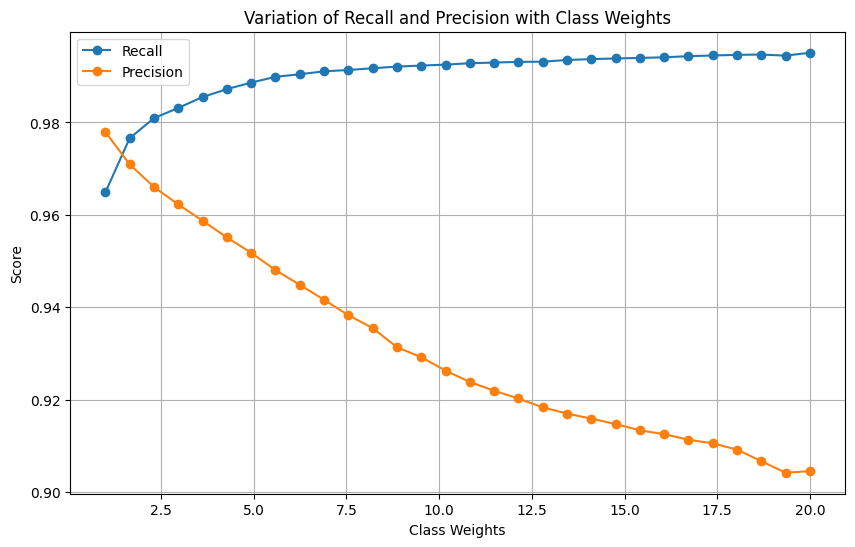

In [ ]:
results = grid.cv_results_
class_weights = np.linspace(1, 20, 30)
recall_scores = results['mean_test_recall']
precision_scores = results['mean_test_precision']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(class_weights, recall_scores, label='Recall', marker='o')
plt.plot(class_weights, precision_scores, label='Precision', marker='o')
plt.title('Variation of Recall and Precision with Class Weights')
plt.xlabel('Class Weights')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
principal=PCA(n_components=32)
principal.fit(X_train)
X_reduced=principal.transform(X_train)
X_test_reduced = principal.transform(X_test)


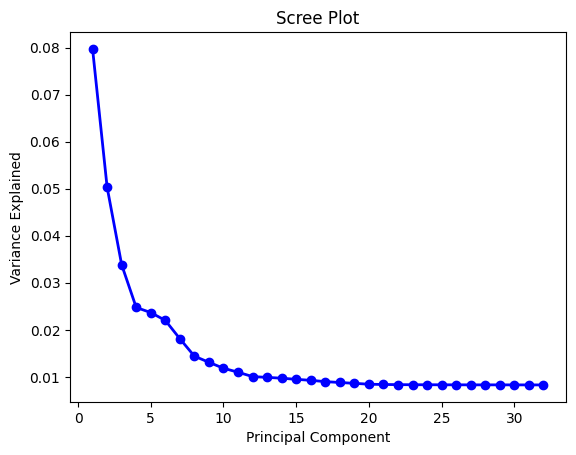

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(principal.n_components_) + 1
plt.plot(PC_values, principal.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
print(principal.explained_variance_ratio_)



[0.07974313 0.05032746 0.03383264 0.0247539  0.02366341 0.02200327
 0.01810421 0.01439337 0.01308543 0.01182157 0.01097824 0.01004656
 0.00987998 0.00970484 0.00946508 0.00925277 0.00897416 0.00879131
 0.00861135 0.00842652 0.00836568 0.00833647 0.00831554 0.00831307
 0.00830152 0.0082969  0.00828971 0.00828938 0.00828753 0.00828345
 0.00827959 0.00827491]


In [ ]:
print(X_reduced.shape)

(125972, 32)


In [ ]:
malicious_count_test = Y_test.sum()
print(malicious_count_test)

12832


In [ ]:
import numpy as np
def min_recall_precision(est, X, y_true, sample_weight = None):
  y_pred = est.predict(X)
  recall = recall_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  return min(recall, precision)

In [ ]:
grid = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                    param_grid={'class_weight':[{0:1, 1:v} for v in np.linspace(1,20,30)] },
                    scoring = {'precision': make_scorer(precision_score),
                             'recall': make_scorer(recall_score),
                    },
                    refit= 'recall',
                    cv = 4,
                    n_jobs=-1)
pred = grid.fit(X_reduced, Y_train).predict(X_test_reduced).sum()
malicious_count_test = Y_test.sum()

f"malicious:{malicious_count_test} predicted:{pred}"

'malicious:12832 predicted:12570'

In [ ]:
pd.DataFrame(pred.cv_results_)


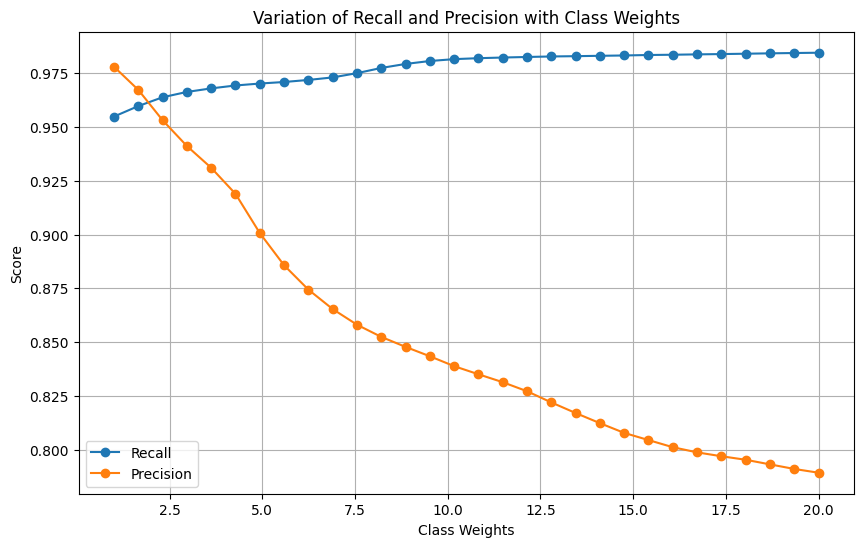

In [ ]:
results = grid.cv_results_
class_weights = np.linspace(1, 20, 30)
recall_scores = results['mean_test_recall']
precision_scores = results['mean_test_precision']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(class_weights, recall_scores, label='Recall', marker='o')
plt.plot(class_weights, precision_scores, label='Precision', marker='o')
plt.title('Variation of Recall and Precision with Class Weights')
plt.xlabel('Class Weights')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model = LogisticRegression(max_iter=1000, class_weight={0:1, 1:3})

predictions = model.fit(X_reduced, Y_train).predict(X_test_reduced)

In [ ]:
from sklearn.metrics import f1_score


In [ ]:
# Calculate recall, precision, and F1 score
recall = recall_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)

# Count of malicious instances in the test set
malicious_count_test = Y_test.sum()

# Print the results
result_string = f"Test Set - malicious:{malicious_count_test} predicted:{predictions.sum()}\n"
result_string += f"Recall: {recall:.4f}\n"
result_string += f"Precision: {precision:.4f}\n"
result_string += f"F1 Score: {f1:.4f}"
print(result_string)

Test Set - malicious:12832 predicted:9740
Recall: 0.6957
Precision: 0.9165
F1 Score: 0.7910


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [ ]:

conf_matrix = confusion_matrix(Y_test, predictions)

print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_predictions = knn_model.fit(X_reduced, Y_train).predict(X_test_reduced)
knn_cm = confusion_matrix(Y_test, knn_predictions)
knn_acc_score = accuracy_score(Y_test, knn_predictions)
print('Confusion matrix: ')
print(knn_cm)
print()
print(f'Accuracy of K Neighbours classifier: {knn_acc_score}')
print()
print(classification_report(Y_test, knn_predictions))


Confusion matrix: 
[[9363  348]
 [4449 8383]]

Accuracy of K Neighbours classifier: 0.7872066716940957

              precision    recall  f1-score   support

           0       0.68      0.96      0.80      9711
           1       0.96      0.65      0.78     12832

    accuracy                           0.79     22543
   macro avg       0.82      0.81      0.79     22543
weighted avg       0.84      0.79      0.79     22543



In [ ]:
recall = recall_score(Y_test, knn_predictions)
precision = precision_score(Y_test, knn_predictions)

f"precsion {precision} vs recall {recall}"

'precsion 0.9601420226778147 vs recall 0.6532886533665836'

In [ ]:
grid = GridSearchCV(estimator=KNeighborsClassifier(),
                    param_grid ={'n_neighbors':[5,6,7,8,9,10]},
                                      scoring = {'precision': make_scorer(precision_score),
                             'recall': make_scorer(recall_score),
                    },
                    refit= 'recall',
                    cv=3,
                    n_jobs=-1)
predictions = grid.fit(X_reduced, Y_train).predict(X_test_reduced).sum()
f"malicious{total_test_malicious} vs predctied {pred}"

In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.084132,0.007303,60.688697,2.810104,5,{'n_neighbors': 5},0.996466,0.996004,0.996773,0.996414,0.000316,4,0.995395,0.994679,0.995804,0.995293,0.000465,1
1,0.062569,0.013206,57.322499,0.901648,6,{'n_neighbors': 6},0.997176,0.996920,0.997281,0.997126,0.000151,1,0.993809,0.993758,0.994627,0.994064,0.000398,4
2,0.058447,0.008716,61.243945,0.823214,7,{'n_neighbors': 7},0.996157,0.996155,0.996159,0.996157,0.000002,6,0.994678,0.994269,0.995344,0.994764,0.000443,2
3,0.056283,0.008422,61.311548,2.007152,8,{'n_neighbors': 8},0.997072,0.996919,0.996667,0.996886,0.000167,2,0.993246,0.993502,0.994576,0.993775,0.000576,5
4,0.055263,0.008036,62.166461,0.860302,9,{'n_neighbors': 9},0.996409,0.996409,0.995903,0.996240,0.000238,5,0.993860,0.993707,0.995139,0.994235,0.000642,3
5,0.056506,0.009065,41.899198,14.658568,10,{'n_neighbors': 10},0.996816,0.997021,0.996359,0.996732,0.000276,3,0.993194,0.993093,0.994269,0.993519,0.000532,6


In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
clf1 = KNeighborsClassifier()
clf2 = LogisticRegression(max_iter=1000, class_weight={0:1, 1:2})

clf3 = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)],
                        voting='soft',
                        weights=[0.5, 0.8])
voting_predictions = clf3.fit(X_reduced, Y_train).predict(X_test_reduced)

              precision    recall  f1-score   support

           0       0.72      0.18      0.29      9711
           1       0.60      0.95      0.74     12832

    accuracy                           0.62     22543
   macro avg       0.66      0.56      0.51     22543
weighted avg       0.66      0.62      0.54     22543



In [ ]:
voting_cm = confusion_matrix(Y_test, voting_predictions)
votin_acc_score = accuracy_score(Y_test, voting_predictions)
print('Confusion matrix: ')
print(voting_cm)
print()
print(f'Accuracy of Voting classifier: {votin_acc_score}')
print(classification_report(Y_test, knn_predictions))

NameError: name 'voting_predictions' is not defined

In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_reduced, Y_train)
rfc_predict = rfc.predict(X_test_reduced)
rfc_cm = confusion_matrix(Y_test, rfc_predict)
rfc_acc_score = accuracy_score(Y_test, rfc_predict)
print('Confusion matrix: ')
print(rfc_cm)
print()
print(f'Accuracy of Random Forest Classifier: {rfc_acc_score}')
print()
print(classification_report(Y_test, rfc_predict))

Confusion matrix: 
[[9471  240]
 [4365 8467]]

Accuracy of Random Forest Classifier: 0.7957237279865147

              precision    recall  f1-score   support

           0       0.68      0.98      0.80      9711
           1       0.97      0.66      0.79     12832

    accuracy                           0.80     22543
   macro avg       0.83      0.82      0.80     22543
weighted avg       0.85      0.80      0.79     22543



In [ ]:
threshold = 0.01
rfc_predict = (rfc.predict_proba(X_test_reduced)[:, 1] > threshold).astype('float')
rfc_cm = confusion_matrix(Y_test, rfc_predict)
rfc_acc_score = accuracy_score(Y_test, rfc_predict)
print('Confusion matrix: ')
print(rfc_cm)
print()
print(f'Accuracy of Random Forest Classifier: {rfc_acc_score}')
print()
print(classification_report(Y_test, rfc_predict))

Confusion matrix: 
[[ 8614  1097]
 [  698 12134]]

Accuracy of Random Forest Classifier: 0.920374395599521

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      9711
           1       0.92      0.95      0.93     12832

    accuracy                           0.92     22543
   macro avg       0.92      0.92      0.92     22543
weighted avg       0.92      0.92      0.92     22543



In [ ]:
svc = SVC(C=2, probability=True, random_state=42)
svc.fit(X_reduced, Y_train)
svc_predict = svc.predict(X_test_reduced)
svc_cm = confusion_matrix(Y_test, svc_predict)
svc_acc_score = accuracy_score(Y_test, svc_predict)
print('Confusion matrix: ')
print(svc_cm)
print()
print(f'Accuracy of SVM: {svc_acc_score}')
print()
print(classification_report(Y_test, svc_predict))

In [ ]:
X = pd.DataFrame(X_reduced)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=len(X.columns), activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

C:\Users\palas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             396 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │             325 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,397 (5.46 KB)

 Trainable params: 1,397 (5.46 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, Y_train, epochs=15, verbose=1)

Epoch 1/15
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 5s 995us/step - accuracy: 0.9461 - loss: 0.1438
Epoch 2/15
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 4s 989us/step - accuracy: 0.9878 - loss: 0.0358
Epoch 3/15
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 4s 980us/step - accuracy: 0.9895 - loss: 0.0320
Epoch 4/15
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 4s 979us/step - accuracy: 0.9907 - loss: 0.0279
Epoch 5/15
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 4s 977us/step - accuracy: 0.9914 - loss: 0.0252
Epoch 6/15
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 4s 961us/step - accuracy: 0.9918 - loss: 0.0241
Epoch 7/15
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9917 - loss: 0.0234
Epoch 8/15
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9924 - loss: 0.0221
Epoch 9/15
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9919 - loss: 0.0220
Epoch 10/15
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9924 - loss: 0.0221
Epoch 11/15
3937/3937 ━━━━━━━━━━━━━━━━━━━━ 4s 994us/step - accuracy: 0.9925 - loss: 0.0210
Epoch 12/15
3937

In [ ]:
_, ann_acc_score = model.evaluate(X_test_reduced, Y_test)
print(f'Accuracy: {ann_acc_score}')
ann_pred = model.predict(X_test_reduced)
ann_pred = [1 if val > 0.01 else 0 for val in ann_pred]
ann_cm = confusion_matrix(Y_test, ann_pred)
print('Confusion matrix: ')
print(ann_cm)
print()
print(classification_report(Y_test, ann_pred))

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.7859 - loss: 1.3665
Accuracy: 0.7839683890342712
705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step
Confusion matrix: 
[[ 8532  1179]
 [ 2256 10576]]

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      9711
           1       0.90      0.82      0.86     12832

    accuracy                           0.85     22543
   macro avg       0.85      0.85      0.85     22543
weighted avg       0.85      0.85      0.85     22543

